#  Proportion Test <hr style="border:2.5px solid #126782"></hr>

<b>Francis Roi F. Buenacosa</b>
<br>Computer Engineer/Technician

In [1]:
# imports and packages
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.stats.proportion import (
    proportions_ztest,
    proportions_chisquare,
    proportion_effectsize)

from statsmodels.stats.power import (
    TTestPower,
    TTestIndPower)

# 1-Proportion Test

In [2]:
""" 
Two-tailed Test
------------------
Ho: sample_proportion = 0.5
Ha: sample_proportion != 0.5
"""
pop_prop = 0.5
sucess = 600
sample_size = 1250

results = stats.binomtest(
    k = sucess,
    n = sample_size,
    p = pop_prop,
    alternative='two-sided'
)

results

BinomTestResult(k=600, n=1250, alternative='two-sided', statistic=0.48, pvalue=0.16574252848396392)

In [3]:
# probability value
p_value = results.pvalue
print(f'p_value: {p_value:.4f}')

# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Product A does not meet 50% expectation.")
else:
    # fail to reject null hypothesis
    print("Product A meets 50% expectation.")

p_value: 0.1657
Product A meets 50% expectation.


In [4]:
""" 
Power of the Test
------------------  
"""

# parameters
pop_prop = 0.5
sucess = 600
sample_size = 1250

sample_prop = sucess/sample_size
cohen_h = abs(proportion_effectsize(sample_prop, pop_prop))

print(f"cohen_h: {cohen_h:.4f}")

# calculate power
power = TTestPower().solve_power(
    effect_size = cohen_h,
    nobs = sample_size,
    alpha = 0.05,
    alternative='two-sided'
)
print(f'power of the test: {power*100:.2f}%')

# 80% power sample size
sample_80p = TTestPower().solve_power(
    effect_size = cohen_h,
    power = 0.8,
    alpha = 0.05,
    alternative='two-sided'
)
print(f"Sample size needed for 80% power: {sample_80p:.0f}")

cohen_h: 0.0400
power of the test: 29.27%
Sample size needed for 80% power: 4905


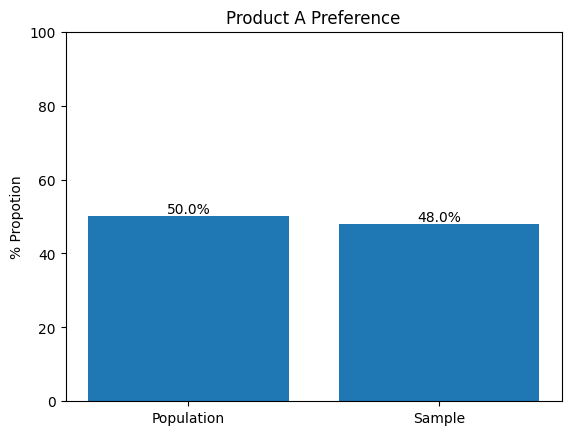

In [5]:
# product A proportion bar graph
pop_prop = 0.5*100
sample_prop = (sucess/sample_size)*100

plt.figure()
bars = plt.bar(['Population','Sample'],[pop_prop,sample_prop])
plt.title('Product A Preference')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()

In [6]:
""" 
LEft-tailed Test
------------------
Ho: sample_proportion = 0.5
Ha: sample_proportion < 0.5
"""
results = stats.binomtest(
    k = 600,
    n = 1250,
    p = 0.5,
    alternative = 'less'
)

results

BinomTestResult(k=600, n=1250, alternative='less', statistic=0.48, pvalue=0.08287126424198196)

In [7]:
# probability value
p_value = results.pvalue
print(f'p_value: {p_value:.4f}')

# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Product A does not meet 50% expectation.")
else:
    # fail to reject null hypothesis
    print("Product A meets 50% expectation.")

p_value: 0.0829
Product A meets 50% expectation.


In [8]:
""" 
Power of the Test
------------------  
"""

# parameters
pop_prop = 0.5
sucess = 600
sample_size = 1250

sample_prop = sucess/sample_size
cohen_h = abs(proportion_effectsize(sample_prop, pop_prop))

print(f"cohen_h: {cohen_h:.4f}")

# calculate power
power = TTestPower().solve_power(
    effect_size = cohen_h,
    nobs = sample_size,
    alpha = 0.05,
    alternative='smaller'
)
print(f'power of the test: {power*100:.2f}%')

# 80% power sample size
sample_80p = TTestPower().solve_power(
    effect_size = -cohen_h, # negative effect size for alternative='smaller'
    power = 0.8,
    alpha = 0.05,
    alternative='smaller'
)
print(f"Sample size needed for 80% power: {sample_80p:.0f}")

cohen_h: 0.0400
power of the test: 0.11%
Sample size needed for 80% power: 3863


# 2 Proportion Test

In [9]:
""" 
Two-tailed Test
----------------
Ho: Board A = Board B
Ha: Board A != Board B
"""
success_A = 35
success_B = 25
sample_A = 150
sample_B = 120

z_stat, p_value = proportions_ztest(
    count = [success_A, success_B],
    nobs = [sample_A, sample_B],
)

print(f'z_stat: {z_stat:.4f}')
print(f'p_value: {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Board A is different from Board B.")
else:
    # fail to reject null hypothesis
    print("There is no significant deference between Board A and Board B.")

z_stat: 0.4910
p_value: 0.6234
There is no significant deference between Board A and Board B.


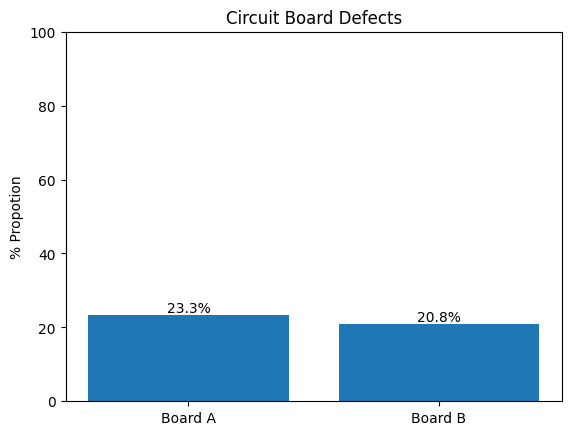

In [10]:
# circuit board defects proportion bar graph
board_A = (success_A/sample_A)*100
board_B = (success_B/sample_B)*100

plt.figure()
bars = plt.bar(['Board A','Board B'],[board_A,board_B])
plt.title('Circuit Board Defects')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()

In [11]:
"""
Right-tailed Test
------------------
Ho: Board A = Board B
Ha: Board A > Board B 
"""
success_A, success_B = 35, 25
sample_A, sample_B = 150, 120

z_stat, p_value = proportions_ztest(
    count = [success_A, success_B],
    nobs = [sample_A, sample_B],
    alternative = 'larger'
    
)

print(f'z_stat: {z_stat:.4f}')
print(f'p_value: {p_value:.4f}')

# verdict
alpha = 0.05
if p_value < alpha:
    # reject null hypothesis
    print("Board A is different from Board B.")
else:
    # fail to reject null hypothesis
    print("There is no significant deference between Board A and Board B.")

z_stat: 0.4910
p_value: 0.3117
There is no significant deference between Board A and Board B.


In [12]:
""" 
Power of the Test
------------------
"""
# parameters
success_A, success_B = 35, 25
sample_A, sample_B = 150, 120

prop_A = success_A/sample_A
prop_B = success_B/sample_B

cohen_h = abs(proportion_effectsize(prop_A, prop_B))

# calculate power
power = TTestIndPower().solve_power(
    effect_size = cohen_h,
    nobs1 = sample_A,
    ratio = sample_B/sample_A, # with respect to sample 2
    alpha = 0.05
)

print(f"Power of the test: {power*100:.2f}%")

# 80% power sample size
sample_80p = TTestIndPower().solve_power(
    effect_size = cohen_h,
    power = 0.8,
    ratio = sample_B/sample_A, # with respect to sample 2
    alpha = 0.05
)
print(f"Sample size needed for 80% power: {sample_80p:.0f}")

Power of the test: 7.80%
Sample size needed for 80% power: 4859


# ANOM

In [13]:
""" 
Analysis of Means
------------------ 
Ho: equal proportions
Ha: at least 1 is different 
"""

success_A = 35
success_B = 25
success_C = 30
trial_A = 150
trial_B = 120
trial_C = 85

chi_stat, p_value, table = proportions_chisquare(
    count = [success_A, success_B, success_C],
    nobs = [trial_A, trial_B, trial_C],
)

print(f'chi_stat: {chi_stat:.4f}')
print(f'p_value: {p_value:.4f}')    

# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("At least 1 of the board is different.")
else:
    # fail to reject null hypothesis
    print("There is no significant difference between the boards.")

chi_stat: 6.0573
p_value: 0.0484
At least 1 of the board is different.


In [14]:
# Boards defect rate
print(f"Board A: {success_A/trial_A:.4f}")
print(f"Board B: {success_B/trial_B:.4f}")
print(f"Board C: {success_C/trial_C:.4f}")

Board A: 0.2333
Board B: 0.2083
Board C: 0.3529


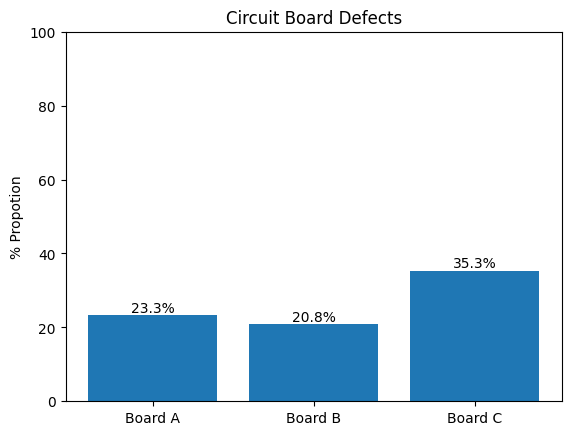

In [15]:
# circuit board defects proportion bar graph
board_A = (success_A/trial_A)*100
board_B = (success_B/trial_B)*100
board_C = (success_C/trial_C)*100

plt.figure()
bars = plt.bar(['Board A','Board B','Board C'],[board_A,board_B,board_C])
plt.title('Circuit Board Defects')
plt.ylabel('% Propotion')
plt.ylim([0,100])

# bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:.1f}%',
             ha='center',va='bottom')
plt.show()